In [1]:
!pip install gdown

In [2]:
import gdown

# File ID from the Google Drive link
file_id = "1fwCJkSEoSzosOoKz-WE5CndH5CCOm4jK"
# Construct the download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
output = "/content/dataset.zip"  # Path to save the downloaded file
gdown.download(url, output, quiet=False)

print(f"File downloaded to: {output}")

Downloading...
From (original): https://drive.google.com/uc?id=1fwCJkSEoSzosOoKz-WE5CndH5CCOm4jK
From (redirected): https://drive.google.com/uc?id=1fwCJkSEoSzosOoKz-WE5CndH5CCOm4jK&confirm=t&uuid=aacac39a-71d2-4890-886a-4168756ced60
To: /content/dataset.zip
100%|██████████| 6.03G/6.03G [00:24<00:00, 244MB/s]

File downloaded to: /content/dataset.zip


In [3]:
import zipfile
import os

# Path to the downloaded .zip file
zip_path = "/content/dataset.zip"

# Directory to extract the dataset
extract_dir = "/content/dataset"

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to: {extract_dir}")

Dataset extracted to: /content/dataset


In [4]:
!pip install datasets

In [5]:
from datasets import load_from_disk

# Path to the extracted dataset directory
dataset_path = os.path.join(extract_dir, "merged_dataset")  # Update if the folder name is different

# Load the dataset
merged_dataset = load_from_disk(dataset_path)

# Use the dataset
print(merged_dataset)

Dataset({
    features: ['image', 'question', 'answer'],
    num_rows: 34876
})


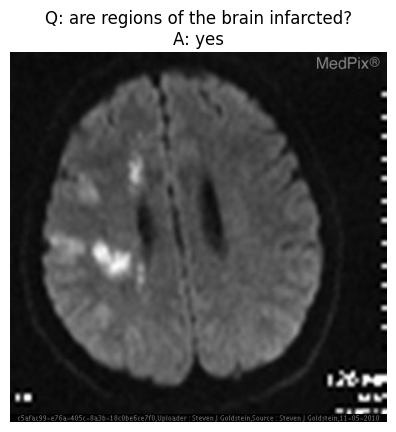

In [6]:
import matplotlib.pyplot as plt

# Get a sample
sample = merged_dataset[0]

# Extract image and text
image = sample["image"]
question = sample["question"]
answer = sample["answer"]

# Display the image
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.title(f"Q: {question}\nA: {answer}")
plt.show()


In [7]:
# First split into train + (validation + test)
train_test_split = merged_dataset.train_test_split(test_size=0.2, seed=42)  # 1 - (19654 / 34876)
train_dataset = train_test_split["train"]  # 19654 samples
remaining_dataset = train_test_split["test"]  # 15222 samples

# Split remaining into validation and test
val_test_split = remaining_dataset.train_test_split(test_size=0.2, seed=42)  # 6719 / 15222
validation_dataset = val_test_split["train"]  # 6259 samples
test_dataset = val_test_split["test"]  # 6719 samples


In [8]:
from datasets import DatasetDict

dataset_dict = DatasetDict({
    "train": train_dataset,
    "validation": validation_dataset,
    "test": test_dataset,
})

print(dataset_dict)


DatasetDict({
    train: Dataset({
        features: ['image', 'question', 'answer'],
        num_rows: 27900
    })
    validation: Dataset({
        features: ['image', 'question', 'answer'],
        num_rows: 5580
    })
    test: Dataset({
        features: ['image', 'question', 'answer'],
        num_rows: 1396
    })
})


In [9]:
dataset_dict.save_to_disk("/kaggle/working/VQA_Medical_Dataset")

Saving the dataset (0/10 shards):   0%|          | 0/27900 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/5580 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1396 [00:00<?, ? examples/s]